In [ ]:
!pip install mtcnn

     |████████████████████████████████| 2.3MB 5.9MB/s 


In [ ]:
!pip install h5

In [ ]:
import h5
# example of loading the keras facenet model
from keras.models import load_model
# load the model
model = load_model('/content/drive/My Drive/facenet_keras.h5')
# summarize input and output shape
print(model.inputs)
print(model.outputs)

[<tf.Tensor 'input_1:0' shape=(None, 160, 160, 3) dtype=float32>]
[<tf.Tensor 'Bottleneck_BatchNorm/batchnorm/add_1:0' shape=(None, 128) dtype=float32>]


#Face Detection 

In [ ]:

# function for face detection with mtcnn
from PIL import Image
from numpy import asarray
from mtcnn.mtcnn import MTCNN

# extract a single face from a given photograph
#We can use this function to extract faces as needed in the next section that can be provided as input to the FaceNet model.

def extract_face(filename, required_size=(160, 160)):

	# load image from file
	image = Image.open(filename)
  
  
	# convert to RGB, if needed
	image = image.convert('RGB')
  
   
	# convert to array
	pixels = asarray(image)
  
  
	# create the detector, using default weights
	detector = MTCNN()
	# detect faces in the image
	results = detector.detect_faces(pixels)
	# extract the bounding box from the first face
	x1, y1, width, height = results[0]['box']
	# bug fix
	x1, y1 = abs(x1), abs(y1)
	x2, y2 = x1 + width, y1 + height
	# extract the face
	face = pixels[y1:y2, x1:x2]
	# resize pixels to the model size
	image = Image.fromarray(face)
	image = image.resize(required_size)
	face_array = asarray(image)
	return face_array

# load the photo and extract the face
pixels = extract_face('/content/drive/My Drive/Criminals/train/Al_Capone/4.jpg')
print(pixels)


[[[ 41  41  41]
  [ 49  49  49]
  [ 62  62  62]
  ...
  [203 203 203]
  [195 195 195]
  [191 191 191]]

 [[ 38  38  38]
  [ 46  46  46]
  [ 57  57  57]
  ...
  [205 205 205]
  [194 194 194]
  [188 188 188]]

 [[ 39  39  39]
  [ 47  47  47]
  [ 57  57  57]
  ...
  [204 204 204]
  [194 194 194]
  [188 188 188]]

 ...

 [[ 20  20  20]
  [ 21  21  21]
  [ 20  20  20]
  ...
  [ 45  45  45]
  [ 45  45  45]
  [ 43  43  43]]

 [[ 18  18  18]
  [ 18  18  18]
  [ 18  18  18]
  ...
  [ 40  40  40]
  [ 41  41  41]
  [ 43  43  43]]

 [[ 20  20  20]
  [ 19  19  19]
  [ 18  18  18]
  ...
  [ 44  44  44]
  [ 43  43  43]
  [ 43  43  43]]]


In this section, we will develop a face detection system to predict the identity of a given face.

The model will be trained and tested using the ‘Criminals dataset‘ that contains many photographs of  different criminals.

We will use an MTCNN model for face detection, the FaceNet model will be used to create a face embedding for each detected face, then we will develop a Linear Support Vector Machine (SVM) classifier model to predict the identity of a given face.

Detect Faces
The first step is to detect the face in each photograph and reduce the dataset to a series of faces only.

Let’s test out our face detector function defined in the previous section, specifically extract_face().

1 (160, 160, 3)
2 (160, 160, 3)
3 (160, 160, 3)
4 (160, 160, 3)
5 (160, 160, 3)
6 (160, 160, 3)


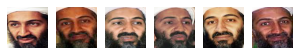

In [ ]:

# demonstrate face detection on Criminals Dataset
from os import listdir
from PIL import Image
from numpy import asarray
from matplotlib import pyplot
from mtcnn.mtcnn import MTCNN
from os import path


# specify folder to plot
folder = '/content/drive/My Drive/Criminals/train/osama_bin_laden/'
i = 1
# enumerate files
for filename in listdir(folder):
	# path
	path = folder + filename
	# get face
	face = extract_face(path)
	print(i, face.shape)
	# plot
	pyplot.subplot(2, 7, i)
	pyplot.axis('off')
	pyplot.imshow(face)
	i += 1
pyplot.show()


In [ ]:
# load images and extract faces for all images in a directory
def load_faces(directory):
	faces = list()
	# enumerate files
	for filename in listdir(directory):
		# path
		path = directory + filename
		# get face
		face = extract_face(path)
		# store
		faces.append(face)
	return faces

In [ ]:
def load_dataset(directory):
	X, y = list(), list()
	# enumerate folders, on per class
	for subdir in listdir(directory):
		# path
		path = directory + subdir + '/'
		# skip any files that might be in the dir
		#if not isdir(path):
			#continue
		# load all faces in the subdirectory
		faces = load_faces(path)
		# create labels
		labels = [subdir for _ in range(len(faces))]
		# summarize progress
		print('>loaded %d examples for class: %s' % (len(faces), subdir))
		# store
		X.extend(faces)
		y.extend(labels)
	return asarray(X), asarray(y)

In [ ]:
import numpy as np
# load train dataset
trainX, trainy = load_dataset('/content/drive/My Drive/Criminals/train/')
print(trainX.shape, trainy.shape)
# load test dataset
testX, testy = load_dataset('/content/drive/My Drive/Criminals/val/')
# save arrays to one file in compressed format
np.savez_compressed('Criminals.npz', trainX, trainy, testX, testy)

>loaded 3 examples for class: Dawood_Ibrahim
>loaded 2 examples for class: Al_Capone
>loaded 4 examples for class: Joseph_Kony
>loaded 1 examples for class: Nathuram_Godse
>loaded 6 examples for class: osama_bin_laden
>loaded 3 examples for class: chhota_rajan
>loaded 1 examples for class: Karim_Lala
>loaded 4 examples for class: El_Chapo
>loaded 3 examples for class: Haji_Mastan
>loaded 1 examples for class: O.J_Simpson
>loaded 3 examples for class: Phoolan_Devi
>loaded 4 examples for class: Ted_Bundy
>loaded 1 examples for class: Tiger_Memon
>loaded 3 examples for class: Veerapan
>loaded 1 examples for class: Varadaraja_Mudaliar
(40, 160, 160, 3) (40,)
>loaded 5 examples for class: Al_Capone
>loaded 6 examples for class: Dawood_Ibrahim
>loaded 8 examples for class: chhota_rajan
>loaded 6 examples for class: Haji_Mastan
>loaded 8 examples for class: El_Chapo
>loaded 2 examples for class: Karim_Lala
>loaded 2 examples for class: Nathuram_Godse
>loaded 1 examples for class: O.J_Simpson


#Create face embeddings


In [ ]:
# calculate a face embedding for each face in the dataset using facenet
from numpy import load
from numpy import expand_dims
from numpy import asarray
from numpy import savez_compressed
from keras.models import load_model
import numpy as np
 
# get the face embedding for one face
def get_embedding(model, face_pixels):
	# scale pixel values
	face_pixels = face_pixels.astype('float32')
	# standardize pixel values across channels (global)
	mean, std = face_pixels.mean(), face_pixels.std()
	face_pixels = (face_pixels - mean) / std
	# transform face into one sample
	samples = expand_dims(face_pixels, axis=0)
	# make prediction to get embedding
	yhat = model.predict(samples)
	return yhat[0]
 
# load the face dataset
data = np.load('Criminals.npz')
trainX, trainy, testX, testy = data['arr_0'], data['arr_1'], data['arr_2'], data['arr_3']
print('Loaded: ', trainX.shape, trainy.shape, testX.shape, testy.shape)

# load the facenet model
model = load_model('/content/drive/My Drive/facenet_keras.h5')
print('Loaded Model')
# convert each face in the train set to an embedding
newTrainX = list()
for face_pixels in trainX:
	embedding = get_embedding(model, face_pixels)
	newTrainX.append(embedding)
newTrainX = asarray(newTrainX)
print(newTrainX.shape)
# convert each face in the test set to an embedding
newTestX = list()
for face_pixels in testX:
	embedding = get_embedding(model, face_pixels)
	newTestX.append(embedding)
newTestX = asarray(newTestX)
print(newTestX.shape)
# save arrays to one file in compressed format
savez_compressed('Criminals-embeddings.npz', newTrainX, trainy, newTestX, testy)

Loaded:  (40, 160, 160, 3) (40,) (88, 160, 160, 3) (88,)
Loaded Model
(40, 128)
(88, 128)


Perform Face Classification

In [ ]:

# load dataset
data = np.load('Criminals-embeddings.npz')
trainX, trainy, testX, testy = data['arr_0'], data['arr_1'], data['arr_2'], data['arr_3']
print('Dataset: train=%d, test=%d' % (trainX.shape[0], testX.shape[0]))

Dataset: train=40, test=88


In [ ]:
from sklearn.preprocessing import Normalizer
# normalize input vectors
in_encoder = Normalizer(norm='l2')
trainX = in_encoder.transform(trainX)
testX = in_encoder.transform(testX)

In [ ]:
from sklearn.preprocessing import LabelEncoder
# label encode targets
out_encoder = LabelEncoder()
out_encoder.fit(trainy)
trainy = out_encoder.transform(trainy)
testy = out_encoder.transform(testy)

In [ ]:
from sklearn.svm import SVC

# fit model
model = SVC(kernel='linear')
model.fit(trainX, trainy)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [ ]:
from sklearn.metrics import accuracy_score
# predict
yhat_train = model.predict(trainX)
yhat_test = model.predict(testX)
# score
score_train = accuracy_score(trainy, yhat_train)
score_test = accuracy_score(testy, yhat_test)
# summarize
print('Accuracy: train=%.3f, test=%.3f' % (score_train*100, score_test*100))

Accuracy: train=92.500, test=90.909


Predicted: Joseph_Kony (23.547)
Expected: Joseph_Kony


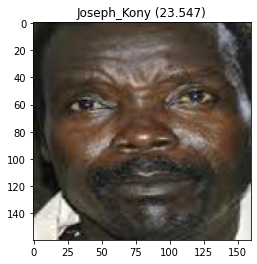

In [ ]:

# develop a classifier for the 5 Celebrity Faces Dataset
from random import choice
from numpy import load
from numpy import expand_dims
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import Normalizer
from sklearn.svm import SVC
from matplotlib import pyplot
# load faces
data = load('Criminals.npz')
testX_faces = data['arr_2']
# load face embeddings
data = load('Criminals-embeddings.npz')
trainX, trainy, testX, testy = data['arr_0'], data['arr_1'], data['arr_2'], data['arr_3']
# normalize input vectors
in_encoder = Normalizer(norm='l2')
trainX = in_encoder.transform(trainX)
testX = in_encoder.transform(testX)
# label encode targets
out_encoder = LabelEncoder()
out_encoder.fit(trainy)
trainy = out_encoder.transform(trainy)
testy = out_encoder.transform(testy)
# fit model
model = SVC(kernel='linear', probability=True)
model.fit(trainX, trainy)
# test model on a random example from the test dataset
selection = choice([i for i in range(testX.shape[0])])
random_face_pixels = testX_faces[selection]
random_face_emb = testX[selection]
random_face_class = testy[selection]
random_face_name = out_encoder.inverse_transform([random_face_class])
# prediction for the face
samples = expand_dims(random_face_emb, axis=0)
yhat_class = model.predict(samples)
yhat_prob = model.predict_proba(samples)
# get name
class_index = yhat_class[0]
class_probability = yhat_prob[0,class_index] * 100
predict_names = out_encoder.inverse_transform(yhat_class)
print('Predicted: %s (%.3f)' % (predict_names[0], class_probability))
print('Expected: %s' % random_face_name[0])
# plot for fun
pyplot.imshow(random_face_pixels)
title = '%s (%.3f)' % (predict_names[0], class_probability)
pyplot.title(title)
pyplot.show()
